In [5]:
import math
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib
import urllib.request as urlreq
import json
from math import *
from functools import reduce
import warnings
import csv
from PriorityFee import *
from auxiliary import *

In [6]:
PA = PriorityArea(lastBlockNumber=12695879, daysBack=30)
blocks = PA.blocks
rewards = PA.rewards
original_gas = PA.original_gas

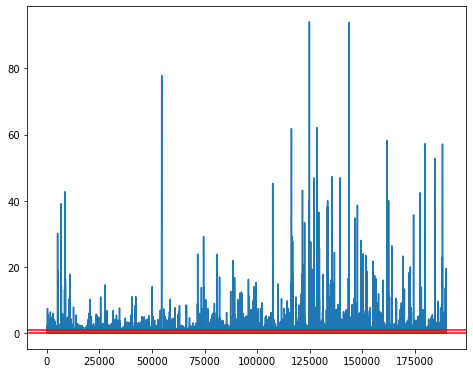

In [10]:
#Visualize flashbots miner rewards

#Note that some txs have 0 gas prices and rewards, probably miner transactions
plt.plot(rewards)
mean = np.mean(rewards)
std = np.std(rewards)
plt.axhline(y = mean, color='r')
plt.axhline(y = mean + std, color='r')
plt.show()

### Controlling the percentage of missed blocks

$$\text{Percentage of missed blocks} = \frac{\text{time_to_double}}{\text{time_to_half} + \text{time_to_double}}$$

Results for gas-based scheme:
Median priority gas price: 51 gwei
Mean priority gas price: 76 gwei
Mean burn: 0.015 eth
Average burn percentage: 18.9%
Total burn percentage: 8.3%
Mean priority gas utilization: 51.4%
Percentage of missed slots: 9.5%



Results for one-off-fee scheme:
Median one-off fee: 0.023 eth
Mean one-off fee: 0.032 eth
Mean burn: 0.025 eth
Average burn percentage: 28.7%
Total burn percentage: 13.7%
Mean priority gas utilization: 80.0%
Percentage of missed slots: 20.0%



Results for hybrid scheme:
Median priority gas price: 50 gwei
Mean priority gas price: 69 gwei
Median one-off fee: 0.019 eth
Mean one-off fee: 0.029 eth
Mean burn: 0.026 eth
Average burn percentage: 28.0%
Total burn percentage: 14.1%
Mean priority gas utilization: 45.7%
Percentage of missed slots: 20.0%


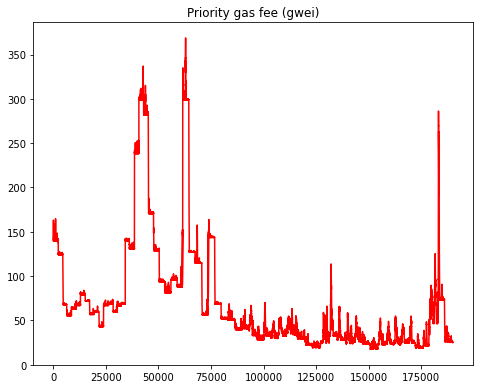

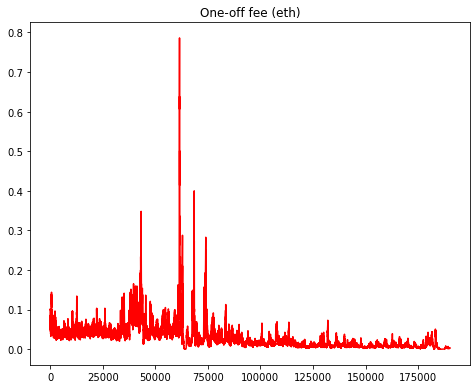

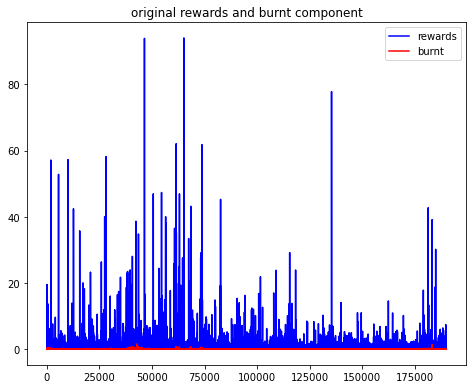

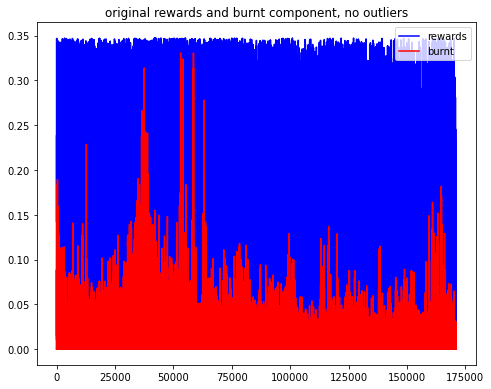

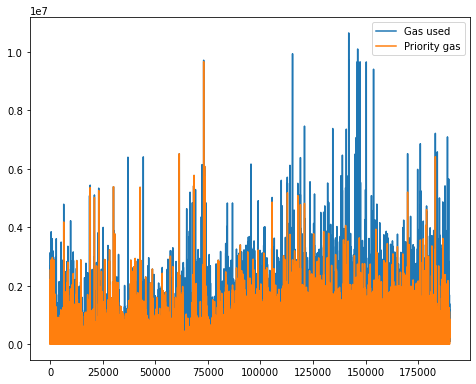

In [12]:
fee0, burnt0, priority_gas0 = PA.gas_based(blocks, target=200000, init_fee=100, time_to_double=6)
fee1, burnt1, priority_gas1 = PA.one_off(blocks, init_fee=0.1, time_to_double=40, time_to_half=10)
one_off_fee2, gas_fee2, burnt2, priority_gas2, viable_gas = PA.hybrid(blocks, init_one_off_fee=0.1, init_gas_fee=10, target=300000,
                                  time_to_double=40, time_to_half=10, gas_doubling_blocks=100, fixed_gas_fee=False)
PA.print_results(burnt0, priority_gas0, gas_fee=fee0, plot=False, title="Results for gas-based scheme:")
PA.print_results(burnt1, priority_gas1, one_off_fee=fee1, plot=False, title="Results for one-off-fee scheme:")
PA.print_results(burnt2, priority_gas2, gas_fee=gas_fee2, one_off_fee=one_off_fee2, plot=True, title="Results for hybrid scheme:")

In [14]:
one_off_fee2, gas_fee2, burnt2, priority_gas2, viable_gas = PA.hybrid(blocks, init_one_off_fee=0.1, init_gas_fee=10, target=300000,
                                  time_to_double=40, time_to_half=10, gas_doubling_blocks=100, fixed_gas_fee=False)
PA.print_results(burnt2, priority_gas2, gas_fee=gas_fee2, one_off_fee=one_off_fee2, plot=False, title="Results for hybrid scheme:")
print(np.mean([p/v for p,v in zip(priority_gas2, viable_gas) if v > 0]))
print(np.sum(priority_gas2)/np.sum(viable_gas))
print(np.mean(viable_gas/original_gas))
print(np.sum(viable_gas)/np.sum(original_gas))

Results for hybrid scheme:
Median priority gas price: 50 gwei
Mean priority gas price: 69 gwei
Median one-off fee: 0.019 eth
Mean one-off fee: 0.029 eth
Mean burn: 0.026 eth
Average burn percentage: 28.0%
Total burn percentage: 14.1%
Mean priority gas utilization: 45.7%
Percentage of missed slots: 20.0%



0.8532946237042195
0.9230216246959312
0.8571123499885528
0.4928647637431326


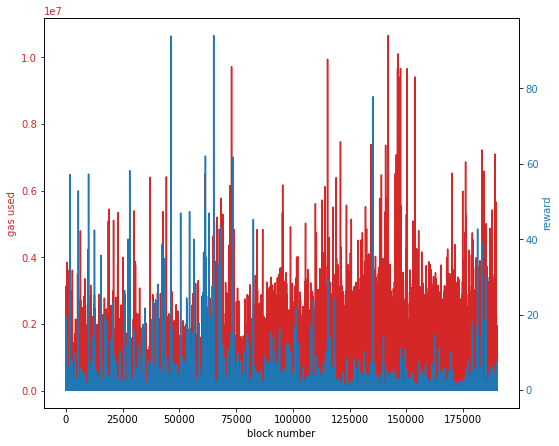

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('block number')
ax1.set_ylabel('gas used', color=color)
ax1.plot([gas_used(block) for block in blocks], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('reward', color=color) 
ax2.plot(rewards, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

In [10]:
np.corrcoef([np.array([gas_used(block) for block in blocks]), PA.rewards])[0][1]

0.09152684166662473

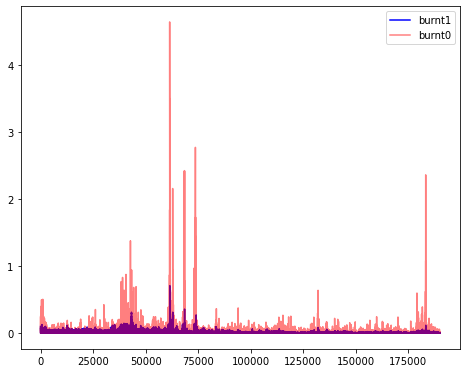

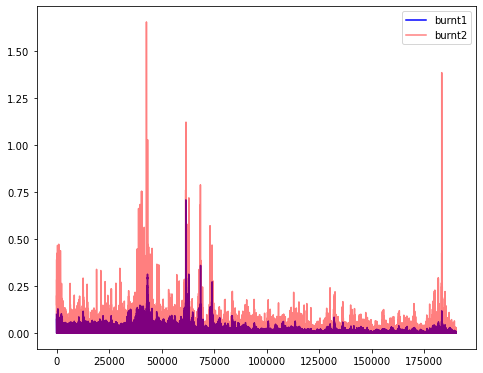

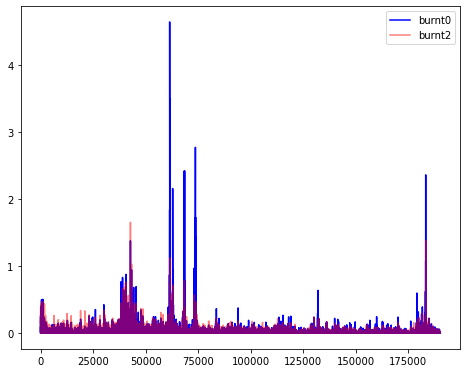

In [11]:
plt.figure()
plt.plot(burnt1, color = 'b')
plt.plot(burnt0, color = 'r', alpha=0.5)
plt.legend(["burnt1", "burnt0"])
plt.show()

plt.figure()
plt.plot(burnt1, color = 'b')
plt.plot(burnt2, color = 'r', alpha=0.5)
plt.legend(["burnt1", "burnt2"])
plt.show()

plt.figure()
plt.plot(burnt0, color = 'b')
plt.plot(burnt2, color = 'r', alpha=0.5)
plt.legend(["burnt0", "burnt2"])
plt.show()



In [12]:
fig, ax1 = plt.subplots()

interval = range(108000,109000)

color = 'tab:red'
ax1.set_xlabel('block number')
ax1.set_ylabel('gas used', color=color)
ax1.plot(rewards[interval], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('reward', color=color) 
ax2.plot(gas_fee[interval], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()


NameError: name 'gas_fee' is not defined

In [ ]:
tx_gas_prices = []
for block in blocks:
    tx_gas_prices[0:0] = [int(tx["gas_price"])*weiToGwei for tx in block["transactions"]]

In [ ]:
tx_gas_prices = np.array(tx_gas_prices)
fig, ax = plt.subplots()
ax.set_yscale("log")
plt.hist(tx_gas_prices[tx_gas_prices < np.percentile(tx_gas_prices, 100)], color = 'red', edgecolor = 'black',
         bins = 300)
plt.show()

In [ ]:
plt.hist(tx_gas_prices[np.logical_and(tx_gas_prices > np.percentile(tx_gas_prices, 90), tx_gas_prices < np.percentile(tx_gas_prices, 99))], color = 'red', edgecolor = 'black',
         bins = int(180/5))
plt.show()